In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [7]:
len(X_train)

60000

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

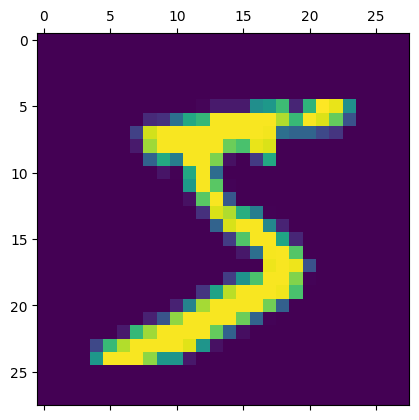

In [14]:
plt.matshow(X_train[0])

#here we scaled the dataset by dividing it by 255


In [9]:
X_train_Scaled=X_train/255
X_test_Scaled=X_test/255

In [10]:
X_train_Scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_Scaled.shape

(60000, 28, 28)

#here we are going to flatten the dataset in (x,784)


In [12]:

X_train_flatten=X_train_Scaled.reshape(len(X_train_Scaled),28*28)
X_test_flatten=X_test_Scaled.reshape(len(X_test_Scaled),28*28)

In [13]:
X_train_flatten.shape

(60000, 784)

In [16]:
model =keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
model.fit(X_train_flatten,y_train,epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1236 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0864 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0522 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0407 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0340 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0240 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.019

In [18]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.9776


[0.08466459065675735, 0.9775999784469604]

In [19]:
y_pred=model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


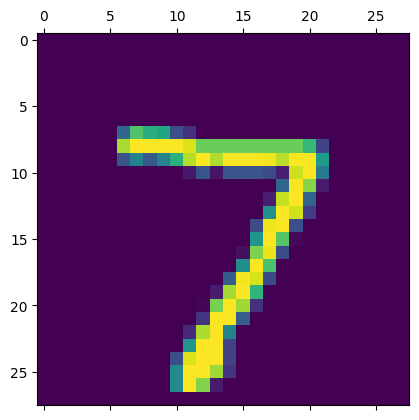

In [27]:
plt.matshow(X_test[0])

In [28]:
np.argmax(y_pred[0])

7

In [20]:
y_pred_val=[np.argmax(i) for i in y_pred]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_val)

In [22]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    0,    0,    0,    1,    5,    1,    3,    3],
       [   0, 1127,    4,    1,    0,    1,    1,    0,    1,    0],
       [   0,    6, 1005,    3,    0,    0,    4,    3,    9,    2],
       [   0,    0,    5,  990,    0,    1,    0,    2,    5,    7],
       [   2,    1,    2,    0,  954,    1,    6,    2,    4,   10],
       [   2,    1,    0,   13,    1,  856,    6,    2,    8,    3],
       [   2,    3,    1,    1,    2,    2,  942,    0,    5,    0],
       [   2,    7,    8,    3,    1,    0,    0,  996,    3,    8],
       [   3,    0,    4,    3,    2,    2,    1,    3,  951,    5],
       [   2,    3,    0,    3,    5,    2,    1,    1,    3,  989]])>

Text(50.722222222222214, 0.5, 'Truth')

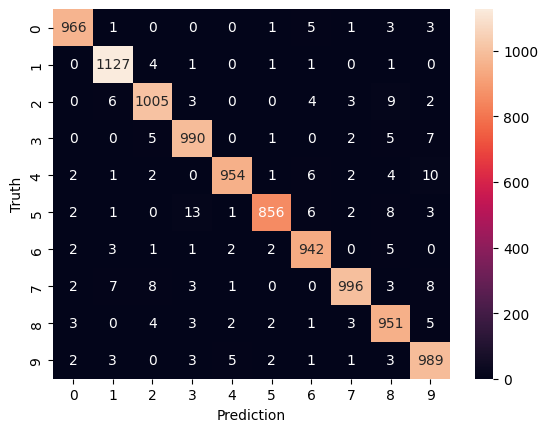

In [25]:
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

**Activation Functions in Neural Networks**

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Different activation functions are used depending on the problem type and network architecture.

https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks

In [29]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define range for plotting
x = np.linspace(-10, 10, 400).astype(np.float32)


1. Sigmoid (Logistic) Function

Formula:

               σ(x)=1/1+e^−x


Range: (0, 1)

Properties:

-Smooth and differentiable.

-Output interpreted as probability.

-Can cause vanishing gradient for large positive/negative inputs.

Use Cases:

-Binary classification (output layer).

-Probabilistic models.

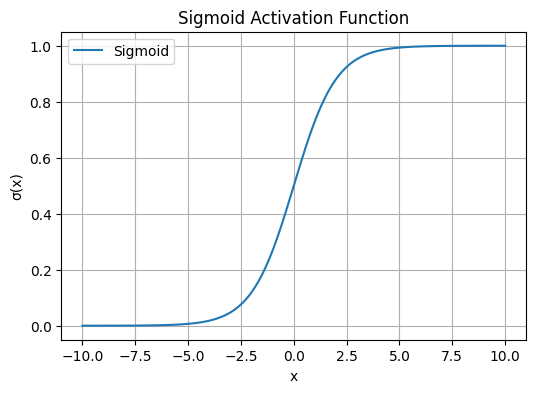

In [30]:
y = tf.sigmoid(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Sigmoid')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()
plt.show()


In [36]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([0.5], dtype=tf.float32)

# Apply Sigmoid activation
output = tf.sigmoid(x)

# Print the result
print(output.numpy())


[0.62245935]


2. Hyperbolic Tangent (Tanh)

Formula:

tanh=    tanh(x)=(e^x+e^−x)/(e^x−e^−x​)


Range: (-1, 1)

Properties:

-Zero-centered, which helps optimization.

-Still suffers from vanishing gradient for large inputs.

Use Cases:

-Hidden layers in feedforward networks.

-Recurrent Neural Networks (RNNs).

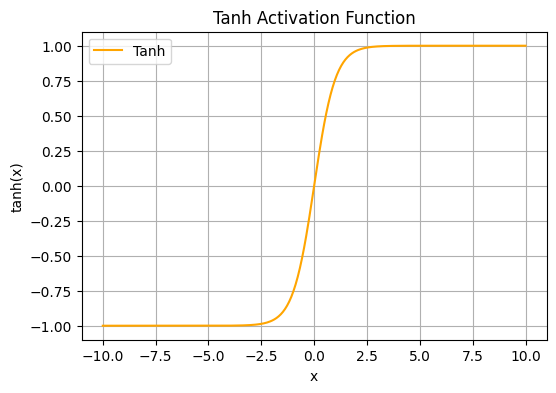

In [31]:
y = tf.math.tanh(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Tanh', color='orange')
plt.title('Tanh Activation Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()
plt.show()


In [37]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([0.5], dtype=tf.float32)

# Apply Tanh activation
output = tf.math.tanh(x)

# Print the result
print(output.numpy())


[0.46211717]


3. ReLU (Rectified Linear Unit)

Formula:

ReLU(x)=max(0,x)

Range: [0, ∞)

Properties:

-Computationally efficient.

-Reduces vanishing gradient problem.

-Can cause "dying ReLU" (neurons stuck at 0).

Use Cases:

-Most hidden layers in modern deep networks (CNNs, MLPs).

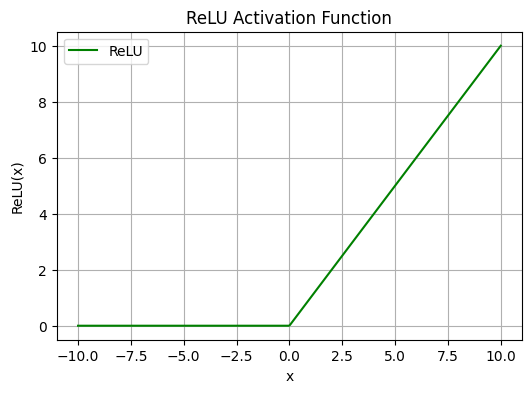

In [32]:
y = tf.nn.relu(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='ReLU', color='green')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()
plt.show()


In [38]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([-1.0, 0.0, 2.0], dtype=tf.float32)

# Apply ReLU activation
output = tf.nn.relu(x)

# Print the result
print(output.numpy())


[0. 0. 2.]


4. Leaky ReLU

Formula:

LeakyReLU(𝑥)={𝑥 𝑥>0 
              𝛼𝑥 𝑥≤0}​ 


Range: (-∞, ∞)

Properties:

-Solves "dying ReLU" problem.
-Small gradient for negative inputs.

Use Cases:

-Hidden layers in deep networks where standard ReLU fails.

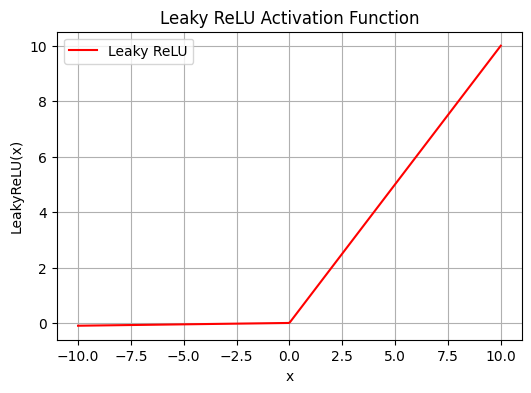

In [33]:
y = tf.nn.leaky_relu(x, alpha=0.01)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('LeakyReLU(x)')
plt.grid(True)
plt.legend()
plt.show()


In [39]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([-1.0, 0.0, 2.0], dtype=tf.float32)

# Apply Leaky ReLU activation
output = tf.nn.leaky_relu(x, alpha=0.01)

# Print the result
print(output.numpy())


[-0.01  0.    2.  ]


5. Softmax

Formula (vector x of length n):
softmax(x_i) = exp(x_i) / sum(exp(x_j) for j in range(n))

Range: (0, 1), sum = 1
Properties:

Converts logits to probabilities

Differentiable

Use Cases:

Multi-class classification (output layer)

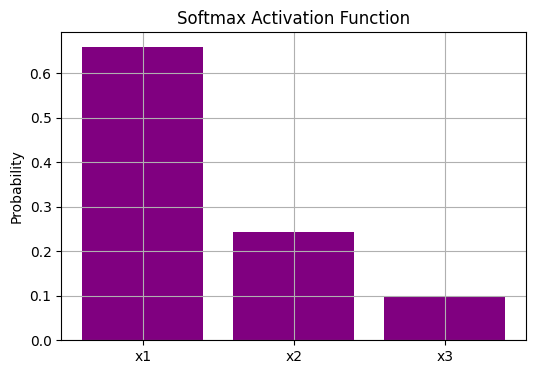

In [ ]:
x_vec = np.array([2.0, 1.0, 0.1], dtype=np.float32)
y_vec = tf.nn.softmax(x_vec)

plt.figure(figsize=(6,4))
plt.bar(['x1','x2','x3'], y_vec.numpy(), color='purple')
plt.title('Softmax Activation Function')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


In [40]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([2.0, 1.0, 0.1], dtype=tf.float32)

# Apply Softmax activation
output = tf.nn.softmax(x, axis=0)

# Print the result
print(output.numpy())


[0.6590012  0.24243298 0.09856589]


6. Swish

Formula:
Swish(x) = x * σ(x)

Properties:

Smooth, non-monotonic

Can perform better than ReLU in deep networks

Use Cases:

Modern deep networks, especially for vision tasks

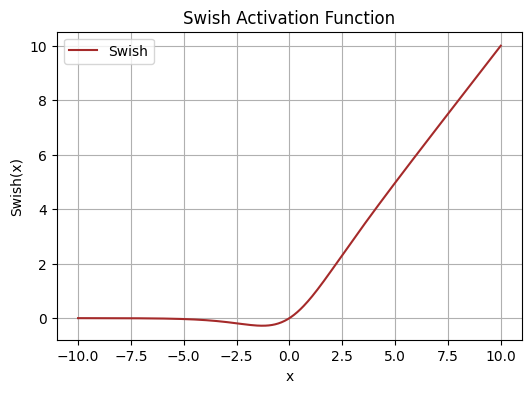

In [35]:
y = x * tf.sigmoid(x)

plt.figure(figsize=(6,4))
plt.plot(x, y, label='Swish', color='brown')
plt.title('Swish Activation Function')
plt.xlabel('x')
plt.ylabel('Swish(x)')
plt.grid(True)
plt.legend()
plt.show()


In [41]:
# Import TensorFlow
import tensorflow as tf

# Create a tensor
x = tf.constant([0.5], dtype=tf.float32)

# Apply Swish activation
swish = x * tf.sigmoid(x)

# Print the result
print(swish.numpy())


[0.31122968]


| Activation | Range   | Pros                          | Cons                      | Typical Use                |
| ---------- | ------- | ----------------------------- | ------------------------- | -------------------------- |
| Sigmoid    | (0, 1)  | Probabilistic, smooth         | Vanishing gradient        | Output layer (binary)      |
| Tanh       | (-1, 1) | Zero-centered                 | Vanishing gradient        | Hidden layers, RNNs        |
| ReLU       | [0, ∞)  | Efficient, sparse             | Dying ReLU                | Hidden layers              |
| Leaky ReLU | (-∞, ∞) | Fixes dying ReLU              | Slightly more computation | Hidden layers              |
| Softmax    | (0, 1)  | Probabilities, differentiable | Not zero-centered         | Output layer (multi-class) |
| Swish      | (-∞, ∞) | Smooth, better for deep nets  | More computation          | Modern deep networks       |


**Loss Function**

https://www.datacamp.com/tutorial/loss-function-in-machine-learning

***Gradient Descent***

https://www.datacamp.com/tutorial/tutorial-gradient-descent

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import sklearn

In [2]:
df=pd.read_csv("./dataset/insurance_data.csv")

In [3]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2,random_state=25)

In [13]:
X_train.shape

(22, 2)

In [14]:
X_train_Scaled=X_train.copy()
X_train_Scaled['age']=X_train_Scaled['age']/100

X_test_Scaled=X_test.copy()
X_test_Scaled['age']=X_test_Scaled['age']/100

In [15]:
X_test_Scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [17]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(X_train_Scaled,y_train,epochs=5000)


Epoch 1/5000
1/1 [==============================] - 0s 472ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1

In [18]:
model.evaluate(X_test_Scaled,y_test)

1/1 [==============================] - 1s 961ms/step - loss: 0.3550 - accuracy: 1.0000


[0.3549775183200836, 1.0]

In [19]:
y_pred=model.predict(X_test_Scaled)

1/1 [==============================] - 0s 233ms/step


In [20]:
y_pred

array([[0.7054848 ],
       [0.35569543],
       [0.16827847],
       [0.47801173],
       [0.7260697 ],
       [0.82949835]], dtype=float32)

In [21]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [22]:
coef,intercept=model.get_weights()
coef,intercept

(array([[5.0608673],
        [1.4086502]], dtype=float32),
 array([-2.913703], dtype=float32))

In [24]:
def sigmoid(x):
    import math
    return 1/(1+math.exp(-x))

In [27]:
def prediction_function(age,aff):
    weighted_sum=coef[0]*age +coef[1]*aff +intercept
    return sigmoid(weighted_sum)

In [28]:
prediction_function(0.47,1)

0.705484819775958

In [29]:
prediction_function(0.18,1)

0.35569544317951163

In [30]:
def log_loss(y_true,y_predicted):
    epsilon=1e-15
    y_predicted_new=[max(i,epsilon) for i in y_predicted]
    y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new=np.array(y_predicted_new)

    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))


In [32]:
def sigmoid_np(x):
    return 1/(1+np.exp(-x))

sigmoid_np(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [35]:
def gradient_descent(age,aff,y_true,epochs,loss_threshold):
    w1=w2=1
    bias=0
    rate=0.5
    n=len(age)
    for i in range(epochs):
        weighted_sum=w1*age +w2*aff+bias
        y_predicted=sigmoid_np(weighted_sum)
        loss=log_loss(y_true,y_predicted)

        w1d=(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d=(1/n)*np.dot(np.transpose(aff),(y_predicted-y_true))
        bias_d=np.mean(y_predicted-y_true)

        w1=w1-rate*w1d
        w2=w2-rate*w2d
        bias=bias-rate*bias_d

        print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        if loss<=loss_threshold:
            break
    return w1,w2,bias


In [36]:
gradient_descent(X_train_Scaled["age"],X_train_Scaled["affordibility"],y_train,1000,0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

*** Building Neural Network From Scratch***

In [54]:
class myANN:
    def __init__(self):
        self.w1=1
        self.w2=1
        self.bias=0
        self.rate=0.5

    
    def fit(self,X,y,epochs,loss_threshold):
        self.w1,self.w2,self.bias=self.gradient_descent(X['age'],X['affordibility'],y,epochs,loss_threshold)
    
    def predict(self,X_test):
        weighted_sum=self.w1*X_test['age']+ self.w2*X_test['affordibility'] +self.bias
        return sigmoid_np(weighted_sum)

    def gradient_descent(self,age,aff,y_true,epochs,loss_threshold):
     n=len(age)
     for i in range(epochs):
        weighted_sum=self.w1*age +self.w2*aff+self.bias
        y_predicted=sigmoid_np(weighted_sum)
        loss=log_loss(y_true,y_predicted)

        w1d=(1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d=(1/n)*np.dot(np.transpose(aff),(y_predicted-y_true))
        bias_d=np.mean(y_predicted-y_true)

        self.w1=self.w1-self.rate*w1d
        self.w2=self.w2-self.rate*w2d
        self.bias=self.bias-self.rate*bias_d

        print(f'Epoch:{i}, w1:{self.w1}, w2:{self.w2}, bias:{self.bias}, loss:{loss}')
        if loss<=loss_threshold:
            break
     return self.w1,self.w2,self.bias

In [55]:
model= myANN()

model.fit(X_train_Scaled,y_train,50,0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

In [56]:
model.predict(X_test_Scaled)

2     0.641252
10    0.537178
21    0.302699
11    0.573926
14    0.648073
9     0.687673
dtype: float64